1. Modify the multipath model from the previous homework assignments so that the transmitter is an array of Nt elements and the receiver is an array of Nr elements. Generate a sequence of a few hundred channel matrices for 4 transmit and 4 receive antennas with optimal element spacing (0.4λ) as the transmitter or receiver moves. Compute the capacity for each channel realization based on the water-filling solution for a given “SNR” (PT/σ2 w) and average over the channels.

The water-filling solution channel capacity is given as $$ C =\sum_{k=1}^{q}\log_2[\frac{\lambda_k}{q}(\sum_{r=1}^{q}\frac{1}{\lambda_r}+\text{SNR}_t)] $$ where $$ \text{SNR}_t=P_t/\sigma_v^2 $$ and $q$ is some integer value such that $q \leq N_t$ and is determined by finding the value of $q$ such that the eigenvalues of the correlation matrix $$ R_{s,k}=\frac{\sigma_v^2}{q}(\text{SNR}_t+\sum_{r=1}^q \frac{1}{\lambda_r})-\frac{\sigma_v^2}{\lambda_k} $$ are greater than zero for all $k$ from 1 to $q$.

a. Plot the average channel capacity as a function of PT/σ2 w over an appropriate range such as 0 to 30 dB. Use a semilogy scale for the vertical axis (capacity) and dB for the horizontal axis (SNR). Include on the same plot the SISO capacity for one transmit and one receive element and the uninformed channel capacity, with a legend or annotation that labels each curve.

b. What happens to the capacity as the number of multipaths becomes small

The channel capacity stops experiencing massive dips with a low scattering environment.

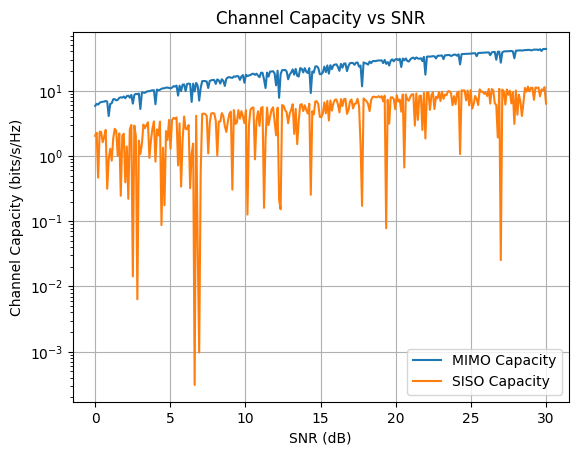

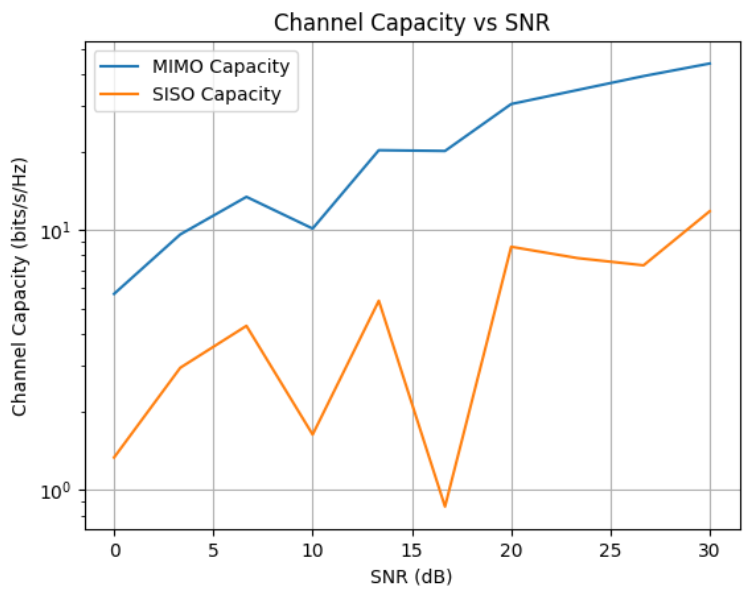

In [71]:
# Scatterer multipath propagation model
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j0

# parameters
f = 1e9
c0 = 3e8
lam = c0/f
k = 2*np.pi/lam
eta = 377
Gr = 10**(1/10)

## Using the same propagation model from the previous assignment ##

# number of points to simulate
points = 300

# scatter points
x_s = np.random.uniform(-10, 10, points)
y_s = np.random.uniform(-10, 10, points)


# transmitter is an array of Nt elements 
# and the receiver is an array of Nr elements.
# Generate a sequence of a few hundred channel 
# matrices for 4 transmit and 4 receive 
# antennas with optimal element spacing (0.4λ)
Nt = 4      # number transmitting elements
Nr = 4      # number receiving elements
d = 0.4*lam # element spacing

# transmitter location
x_t = 0
y_t = 0

# moving receiver locations
x_r = np.linspace(-10, 10, points)
y_r = np.zeros(points)

# reflection coefficient
ref_coef = -1

# SNRt
SNRt_dB = np.linspace(0, 30, points) # SNR in dB
SNRt = 10**(SNRt_dB/10)            # SNR in linear scale

# calculate the channel matrix
H = np.zeros([points, Nt, Nr], dtype=complex)

for m in range(0,points):
    # calculate the fields
    for n in range(0,Nr):
        # element positions within the tx array
        x_t_e = x_t + n*d

        # element positions within the moving rx array
        x_r_e = x_r[m] + n*d    
        
        # distance between scatterer and receiver
        delta_r = np.sqrt((x_t_e - x_s[m])**2 + (y_t - y_s[m])**2) \
                - np.sqrt((x_s[m] - x_r_e)**2 + (y_s[m] - y_r[m])**2)
        
        # received field
        H[m, n, n] = 1+ref_coef*np.exp(-1j*k*delta_r)

# single value decomposition
U = np.zeros([points, Nt, Nr], dtype=complex)
S = np.zeros([points, 1, Nr], dtype=complex)
Vh = np.zeros([points, Nt, Nr], dtype=complex)
L = np.zeros([points, 1, Nr], dtype=complex)
for m in range(0, points):
    # SVD of H
    U[m, :, :], S[m, :, :], Vh[m, :, :] = np.linalg.svd(H[m])
    # calculate the eigenvalues
    L[m, :, :] = np.linalg.diagonal(S[m, :, :])

# calculate q
q_chosen = np.zeros(points, dtype=complex)
for i in range(0, points):
    for j in range(0, Nt):
        # calculate the correlation matrix
        q = Nt-j
        R_sk = np.var(Vh[i,:,:]) * (SNRt[i]+np.sum(1/L[j,:,:])) / q - 1/L[j,:,:]
        # are all eigenvalues positive?
        if np.all(R_sk > 0):
            q_chosen = Nt-j
            break

# calculate the channel capacity
C = np.zeros(points, dtype=complex)
for k in range(0, points):
    C[k] = np.sum(np.log2(L[k]/q_chosen * np.sum(1/L[k]+SNRt[k])))

# Plot the average channel capacity as a function of PT/σ2 w 
# over an appropriate range such as 0 to 30 dB. 
# Use a semilogy scale for the vertical axis (capacity) and dB for the horizontal axis (SNR). 
# Include on the same plot the SISO capacity for one transmit and one receive element and the uninformed channel capacity, 
# with a legend or annotation that labels each curve.
plt.semilogy(SNRt_dB, C, label='MIMO Capacity')
plt.grid()
plt.xlabel('SNR (dB)')
plt.ylabel("Channel Capacity (bits/s/Hz)")
plt.title("Channel Capacity vs SNR")

# SISO Version
# calculate the channel capacity
C = np.zeros(points, dtype=complex)
for k in range(0, points):
    C[k] = np.log2(1 + SNRt[k]*np.abs(H[k,0,0])**2)

plt.semilogy(SNRt_dB, C, label='SISO Capacity')
plt.legend()
plt.show()

# What happens to the capacity as the number of multipaths becomes small
from IPython.display import Image
from IPython.core.display import HTML 

# show work done by hand
display(Image("10 scatter points.png", width=570, height=570))

2. Change your model to use circular arrays with 10 elements or so spaced a half wavelength apart so that the arrays can control the radiation patterns in all directions. For a propagation environment model with two or three multipaths, plot the eigenpatterns at the transmit or receive side corresponding to the largest two or three singular values of the channel matrix. Relate these patterns to the physical channel. This can be done by overlaying polar plots of the patterns on an x-y plot of the receiver, transmitter, and scatterer locations.

In [72]:
# Scatterer multipath propagation model
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j0

# parameters
f = 1e9
c0 = 3e8
lam = c0/f
k = 2*np.pi/lam
eta = 377
Gr = 10**(1/10)

## Using the same propagation model from the previous assignment ##

# number of points to simulate
points = 300

# scatter points
x_s = np.random.uniform(-10, 10, points)
y_s = np.random.uniform(-10, 10, points)


# circular arrays with 10 elements or so 
# spaced a half wavelength apart
Nt = 10     # number transmitting elements
Nr = 10     # number receiving elements
d = lam/2   # element spacing

# transmitter location

# Parameters
d = lam / 2         # Desired element spacing

# Calculate radius for desired spacing
R = d / (2 * np.sin(np.pi / Nt))

# Generate angles
angles = np.linspace(0, 2*np.pi, Nt, endpoint=False)

# Cartesian coordinates
x_t = R * np.cos(angles)
y_t = R * np.sin(angles)

# moving receiver locations
x_r = np.linspace(x_t-10, x_t+10, points)
print(x_r)
#x_r = x_t - 10
y_r = y_t - 10

# Plotting
# plt.figure(figsize=(5,5))
# plt.plot(x_t, y_t, 'bo')
# plt.plot(x_r, y_r, 'ro')
# plt.plot(0, 0, 'r+')  # center
# plt.gca().set_aspect('equal')
# plt.title("10-Element Circular Array\n(Spacing = λ/2)")
# plt.grid(True)
# plt.xlabel("x (λ units)")
# plt.ylabel("y (λ units)")
# plt.show()

[[ -9.7572949   -9.80364745  -9.925      ... -10.075       -9.925
   -9.80364745]
 [ -9.69040527  -9.73675782  -9.85811037 ... -10.00811037  -9.85811037
   -9.73675782]
 [ -9.62351564  -9.66986819  -9.79122074 ...  -9.94122074  -9.79122074
   -9.66986819]
 ...
 [ 10.10892583  10.06257328   9.94122074 ...   9.79122074   9.94122074
   10.06257328]
 [ 10.17581547  10.12946292  10.00811037 ...   9.85811037  10.00811037
   10.12946292]
 [ 10.2427051   10.19635255  10.075      ...   9.925       10.075
   10.19635255]]


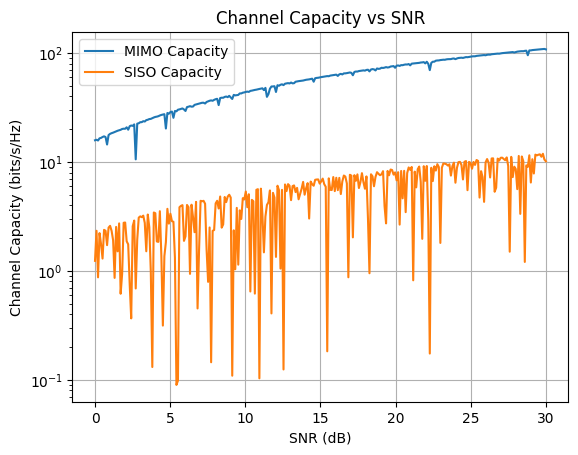

In [73]:
# reflection coefficient
ref_coef = -1

# SNRt
SNRt_dB = np.linspace(0, 30, points) # SNR in dB
SNRt = 10**(SNRt_dB/10)            # SNR in linear scale

# calculate the channel matrix
H = np.zeros([points, Nt, Nr], dtype=complex)

for m in range(0,points):
    # calculate the fields
    for n in range(0,Nr):

        # distance between scatterer and receiver
        delta_r = np.sqrt((x_t[n] - x_s[m])**2 + (y_t[n] - y_s[m])**2) \
                - np.sqrt((x_s[m] - x_r[m,n])**2 + (y_s[m] - y_r[n])**2)
        # received field
        H[m, n, n] = 1+ref_coef*np.exp(-1j*k*delta_r)

# single value decomposition
U = np.zeros([points, Nt, Nr], dtype=complex)
S = np.zeros([points, 1, Nr], dtype=complex)
Vh = np.zeros([points, Nt, Nr], dtype=complex)
L = np.zeros([points, 1, Nr], dtype=complex)
for m in range(0, points):
    # SVD of H
    U[m, :, :], S[m, :, :], Vh[m, :, :] = np.linalg.svd(H[m])
    # calculate the eigenvalues
    L[m, :, :] = np.linalg.diagonal(S[m, :, :])

# calculate q
q_chosen = np.zeros(points, dtype=complex)
for i in range(0, points):
    for j in range(0, Nt):
        # calculate the correlation matrix
        q = Nt-j
        R_sk = np.var(Vh[i,:,:]) * (SNRt[i]+np.sum(1/L[j,:,:])) / q - 1/L[j,:,:]
        # are all eigenvalues positive?
        if np.all(R_sk > 0):
            q_chosen = Nt-j
            break

# calculate the channel capacity
C = np.zeros(points, dtype=complex)
for k in range(0, points):
    C[k] = np.sum(np.log2(L[k]/q_chosen * np.sum(1/L[k]+SNRt[k])))

# Plot the average channel capacity as a function of PT/σ2 w 
# over an appropriate range such as 0 to 30 dB. 
# Use a semilogy scale for the vertical axis (capacity) and dB for the horizontal axis (SNR). 
# Include on the same plot the SISO capacity for one transmit and one receive element and the uninformed channel capacity, 
# with a legend or annotation that labels each curve.
plt.semilogy(SNRt_dB, C, label='MIMO Capacity')
plt.grid()
plt.xlabel('SNR (dB)')
plt.ylabel("Channel Capacity (bits/s/Hz)")
plt.title("Channel Capacity vs SNR")

# SISO Version
# calculate the channel capacity
C = np.zeros(points, dtype=complex)
for k in range(0, points):
    C[k] = np.log2(1 + SNRt[k]*np.abs(H[k,0,0])**2)

plt.semilogy(SNRt_dB, C, label='SISO Capacity')
plt.legend()
plt.show()